In [4]:
import numpy as np
import matplotlib.pyplot as plt

import variational_polaron as varpol
import variational_polaron_P2 as varpolP2

class SpinBosonEnv:
    def __init__(self, ks, ws, gs):
        #
        # k = The momenta
        # wk = Distribution of mode frequencies (degeneracies allowed)
        # gk = Coupling of the system to each mode
        #
        self.ks = ks
        self.ws = ws
        self.gs = gs
        self.N = ks.size

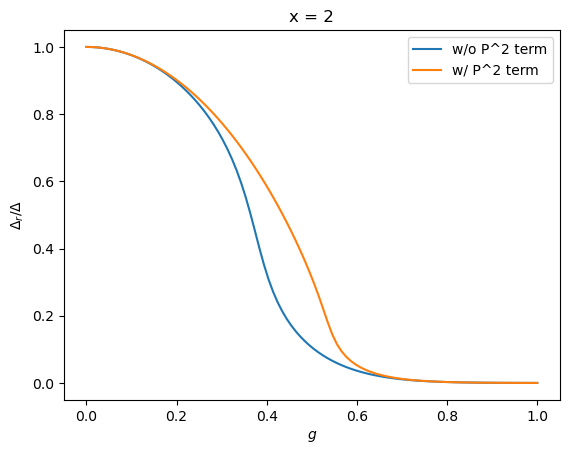

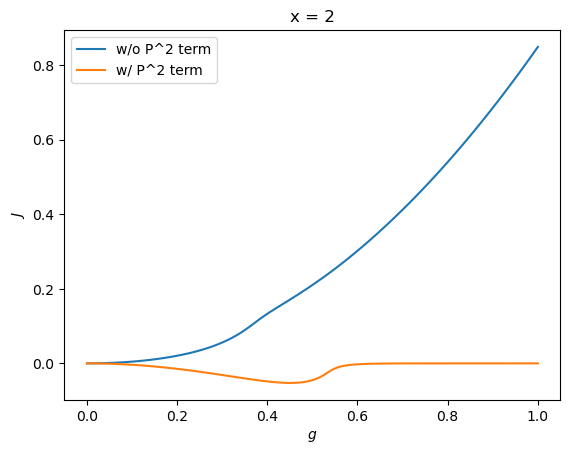

In [18]:
N = 100
w0 = 1.0
gamma = 0.4
ks = 2 * np.pi * np.arange(N) / N
ws = w0 - 2 * gamma * np.cos(ks)

x = 2
delta = 0.3
gs = np.linspace(0.0, 1.0, 100)

deltars = []
Js = []
deltars2 = []
Js2 = []
for g in gs:
    env = SpinBosonEnv(ks, ws, g * np.ones(N) / np.sqrt(N))
    deltar, J = varpol.variational_deltar(delta, x, env)
    deltars.append(deltar)
    Js.append(J)
    
    env = SpinBosonEnv(ks, ws, g * np.ones(N) / np.sqrt(N))
    deltar, J = varpolP2.variational_deltar(delta, x, env)
    deltars2.append(deltar)
    Js2.append(J)
    
plt.plot(gs, np.array(deltars) / delta, label='w/o P^2 term')
plt.plot(gs, np.array(deltars2) / delta, label='w/ P^2 term')
plt.xlabel(r'$g$')
plt.ylabel(r'$\Delta_r/ \Delta$')
plt.legend()
plt.title(f'x = {x}')
plt.show()

plt.plot(gs, Js, label='w/o P^2 term')
plt.plot(gs, Js2, label='w/ P^2 term')
plt.xlabel(r'$g$')
plt.ylabel(r'$J$')
plt.legend()
plt.title(f'x = {x}')
plt.show()

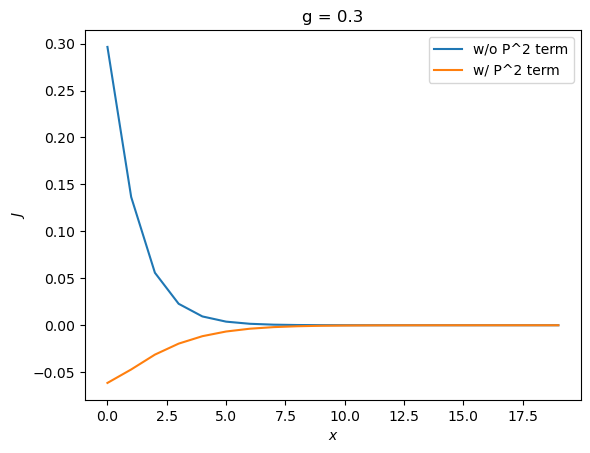

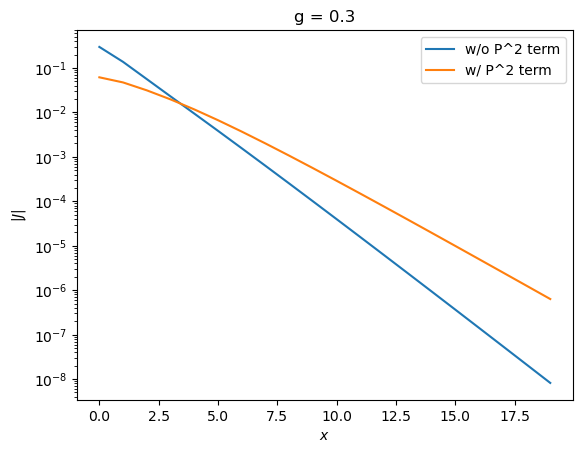

In [16]:
N = 100
w0 = 1.0
gamma = 0.4
ks = 2 * np.pi * np.arange(N) / N
ws = w0 - 2 * gamma * np.cos(ks)

xs = np.arange(0, 20, 1)
delta = 0.3
g = 0.3

env = SpinBosonEnv(ks, ws, g * np.ones(N) / np.sqrt(N))

Js = []
Js2 = []
for x in xs:
    deltar, J = varpol.variational_deltar(delta, x, env)
    Js.append(J)
    
    env = SpinBosonEnv(ks, ws, g * np.ones(N) / np.sqrt(N))
    deltar, J = varpolP2.variational_deltar(delta, x, env)
    Js2.append(J)

plt.plot(xs, Js, label='w/o P^2 term')
plt.plot(xs, Js2, label='w/ P^2 term')
plt.xlabel(r'$x$')
plt.ylabel(r'$J$')
plt.legend()
plt.title(f'g = {g}')
plt.show()

plt.plot(xs, Js, label='w/o P^2 term')
plt.plot(xs, np.abs(Js2), label='w/ P^2 term')
plt.yscale('log')
plt.xlabel(r'$x$')
plt.ylabel(r'$|J|$')
plt.legend()
plt.title(f'g = {g}')
plt.show()